In [2]:
import pandas as pd
import seaborn as sn

In [3]:
df = pd.read_csv("bhp.csv")
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [4]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [8]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [9]:
min_thresold, max_thresold = df.price_per_sqft.quantile([0.001, 0.999])
min_thresold, max_thresold

(1366.184, 50959.36200000098)

In [10]:
df_no_outlier = df[(df.price_per_sqft>min_thresold) & (df.price_per_sqft<max_thresold)]

In [11]:
df_no_outlier.shape

(13172, 7)

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

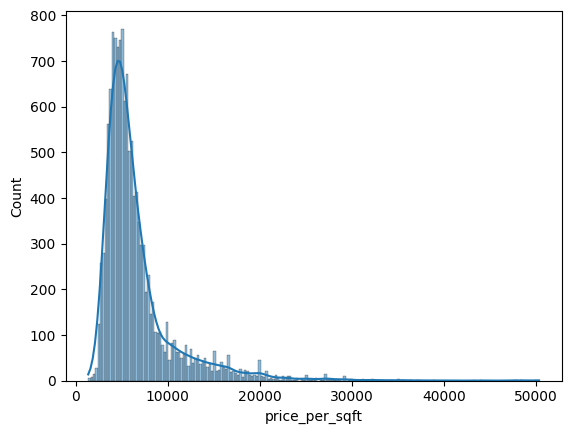

In [12]:
sn.histplot(df_no_outlier.price_per_sqft, kde=True)

In [13]:
mean = df_no_outlier.price_per_sqft.mean()
mean

6663.6537351958705

In [14]:
std_deviation = df_no_outlier.price_per_sqft.std()
std_deviation

4141.020700174613

In [15]:
mean - 4*std_deviation

-9900.429065502582

In [16]:
mean + 4*std_deviation

23227.73653589432

In [17]:
df_no_outliner_new = df_no_outlier[(df_no_outlier.price_per_sqft>-9900.42) & (df_no_outlier.price_per_sqft<23227.73)]

In [18]:
df_no_outliner_new.shape

(13047, 7)

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

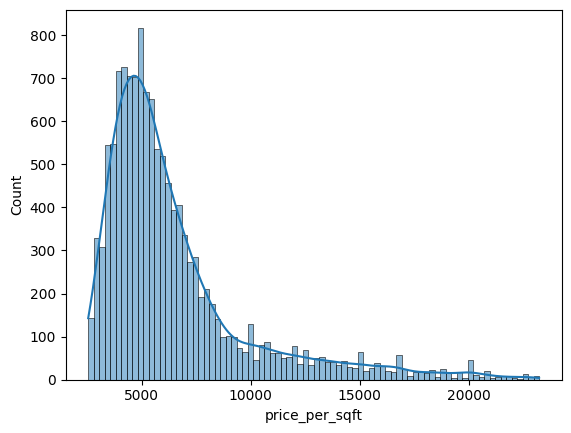

In [18]:
sn.histplot(df_no_outliner_new.price_per_sqft, kde=True)

In [19]:
df_no_outlier['z_score'] = (df_no_outlier.price_per_sqft - df_no_outlier.price_per_sqft.mean()) / df_no_outlier.price_per_sqft.std()
df_no_outlier.head(5)

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [20]:
df_no_outlier[df_no_outlier['z_score']>4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [21]:
df_no_outlier[df_no_outlier['z_score']<4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [22]:
df_new = df_no_outlier[(df_no_outlier.z_score>-4)&(df_no_outlier.z_score<4)]
df_new.shape

(13047, 8)